In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import time

In [2]:
import sys
sys.path.append("../code")
import model
import plotting
import parameters

In [3]:
params_m1 = parameters.get_params(scen=1)
params_m2 = parameters.get_params(scen=2)
params_m3 = parameters.get_params(scen=3)
params_m4 = parameters.get_params(scen=4)
params_m5 = parameters.get_params(scen=5)
params_mfull = parameters.get_params(scen=1)
params_mfull.update({'feedback_off': True,
                     'alpha_w':0,
                     'alpha_u':0
                    })

effective immune rate: [0.32  0.648 0.736 0.816 0.904 0.96 ]
total effective immune rate: 0.68032
effective immune rate: [0.32  0.648 0.736 0.816 0.904 0.96 ]
total effective immune rate: 0.68032
effective immune rate: [0.32  0.648 0.736 0.816 0.904 0.96 ]
total effective immune rate: 0.68032
effective immune rate: [0.32  0.648 0.736 0.816 0.904 0.96 ]
total effective immune rate: 0.68032
effective immune rate: [0.32  0.648 0.736 0.816 0.904 0.96 ]
total effective immune rate: 0.68032
effective immune rate: [0.32  0.648 0.736 0.816 0.904 0.96 ]
total effective immune rate: 0.68032


In [4]:
m1 = model.Model(**params_m1)
m2 = model.Model(**params_m2)
m3 = model.Model(**params_m3)
m4 = model.Model(**params_m4)
m5 = model.Model(**params_m5)
mfull = model.Model(**params_mfull)

In [5]:
for m in [m1,m2,m3,m4,m5,mfull]:
    start_time = time.time()
    tmp = m.run()
    print(time.time() - start_time)
[(m.chopped_data() < 0 ).any() for m in [m1,m2,m3,m4,m5,mfull]]

18.97815251350403
18.79690647125244
20.093036890029907
18.761282205581665
18.66284990310669
14.201375961303711


[False, False, False, False, False, False]

In [6]:
figure2 = {
    'type': 'scenarios',
    'ax1': 'NPI',
    'ax2': 'Incidence',
    'ax3': 'ICU',
    'ax4': 'Vaccines',
#    'ax4': 'Selfregulation',
    'ax5': 'Immunity',
    'ax6': 'Deaths',
    'c1': '#1B1919FF',
    'c2': '#00468BFF',
    'c3': '#46DCBAFF',
#    'c3': '#46DCA9FF',
    'Scens': [1,3,5]
}

figure3 = {
    'type': 'scenarios',
    'ax1': 'NPI',
    'ax2': 'Incidence',
    'ax3': 'ICU',
    'ax4': 'Vaccines',
#    'ax4': 'Selfregulation',
    'ax5': 'Immunity',
    'ax6': 'Deaths',
    'c1': '#484343FF',
    'c2': '#00468BFF',
    'c3': '#0099B4FF',
    'Scens': [2,3,4]
}

In [182]:
m1.gamma

array([0.09998, 0.09978, 0.09867, 0.09565, 0.09314, 0.08809])

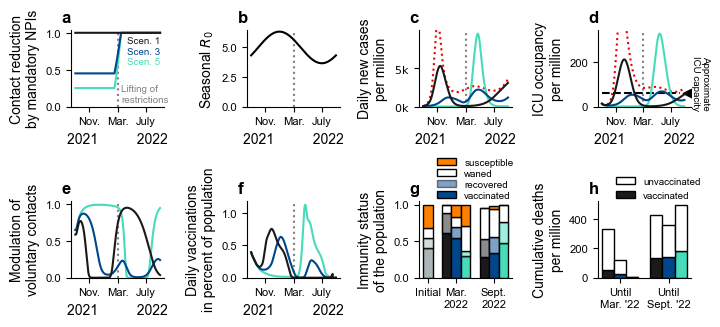

In [230]:
panels = {'ax1':'NPI','ax2':'Seasonality','ax3':'Incidence','ax4':'ICU',
          'ax5':'Selfregulation','ax6':'Vaccines','ax7':'Compartments','ax8':'Deaths'}
colors = ['#1B1919FF', '#00468BFF','#46DCBAFF']
names = ['Scen. 1', 'Scen. 3', 'Scen. 5']
import importlib
importlib.reload(plotting)
plotting.eightpanels([m1,m3,m5], panels, colors, path="./figures/fig_scenarios_135.pdf",
                     arial=True, full_wave=mfull, ICUcap=60, names=names)

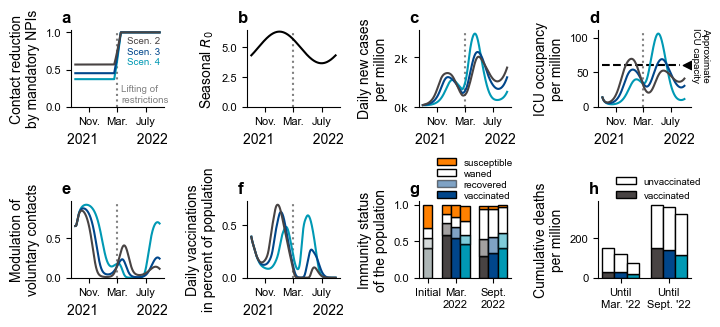

In [231]:
colors = ['#484343FF', '#00468BFF', '#0099B4FF']
names = ['Scen. 2', 'Scen. 3', 'Scen. 4']
import importlib
importlib.reload(plotting)
plotting.eightpanels([m2,m3,m4], panels, colors, path="./figures/fig_scenarios_234.pdf",
                     arial=True, ICUcap=60, names=names)

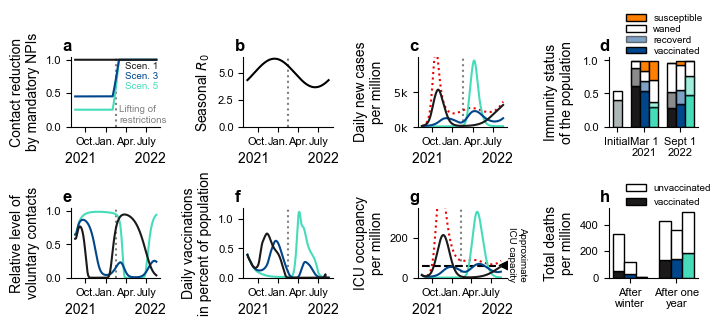

In [210]:
panels = {'ax1':'NPI','ax2':'Seasonality','ax3':'Incidence','ax4':'Compartments',
          'ax5':'Selfregulation','ax6':'Vaccines','ax7':'ICU','ax8':'Deaths'}
colors = ['#1B1919FF', '#00468BFF','#46DCBAFF']
names = ['Scen. 1', 'Scen. 3', 'Scen. 5']
import importlib
importlib.reload(plotting)
plotting.eightpanels([m1,m3,m5], panels, colors, path="./figures/fig_scenarios_135.pdf",
                     arial=True, full_wave=mfull, ICUcap=60, names=names)

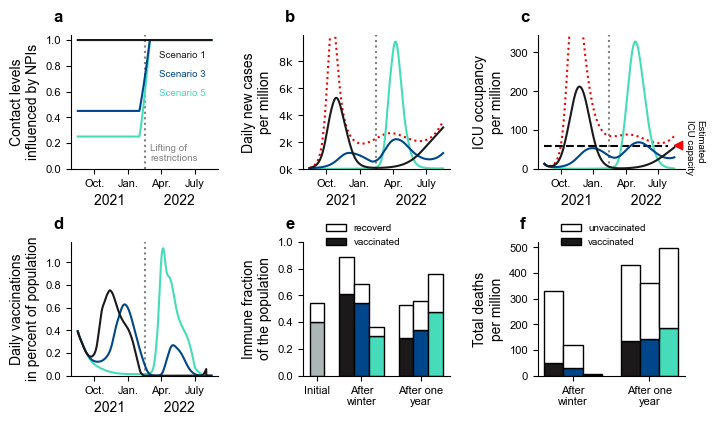

In [165]:
panels = {'ax1':'NPI','ax2':'Incidence','ax3':'ICU',
          'ax4':'Vaccines','ax5':'Immunity','ax6':'Deaths'}
colors = ['#1B1919FF', '#00468BFF','#46DCBAFF']
names = ['Scenario 1', 'Scenario 3', 'Scenario 5']
import importlib
importlib.reload(plotting)
plotting.sixpanels([m1,m3,m5], panels, colors,
                     arial=True, full_wave=mfull, ICUcap=60, names=names)

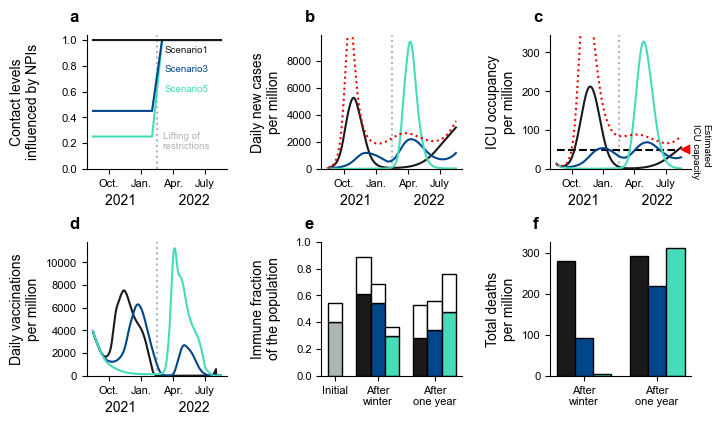

In [68]:
import importlib
importlib.reload(plotting)
plotting.sixpanels_flexible([m1,m3,m5], figure2, "./figures/fig_scenarios_135.pdf", arial=True, ICUcap=50, full_wave=mfull)
#, full_wave=mfull

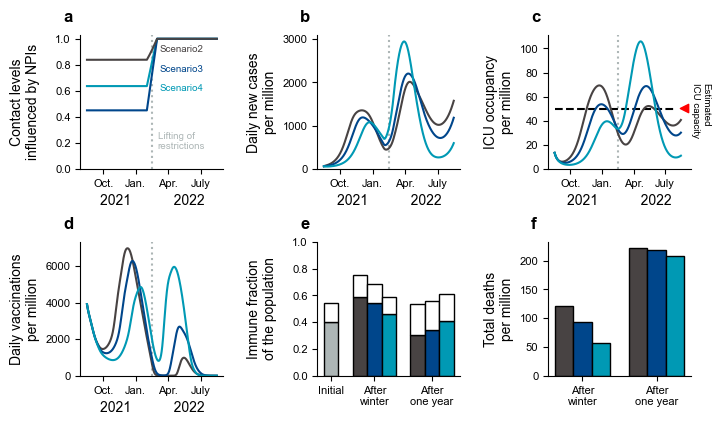

In [35]:
import importlib
importlib.reload(plotting)
plotting.sixpanels_flexible([m2,m3,m4], figure3, "./figures/fig_scenarios_234.pdf", arial=True, ICUcap=50)
#, full_wave=mfull

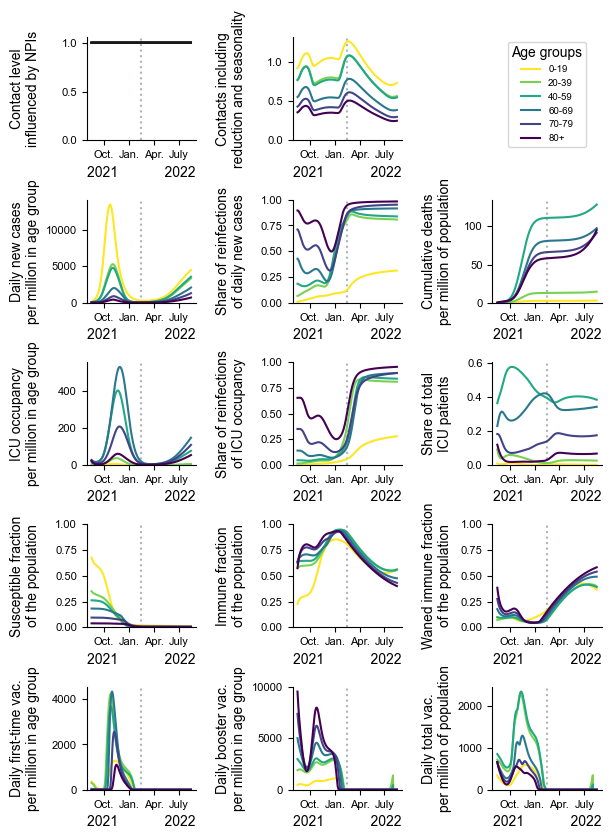

In [17]:
plotting.overview_agegroups(m1, path='./figures/fig_overviewAG_scen1.pdf', arial=True, scen=1)

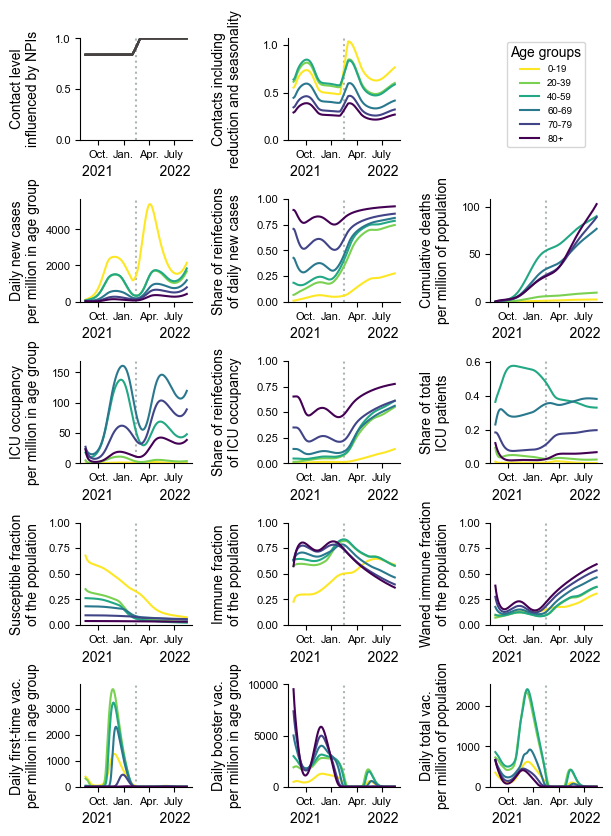

In [18]:
plotting.overview_agegroups(m2, path='./figures/fig_overviewAG_scen2.pdf', arial=True, scen=2)

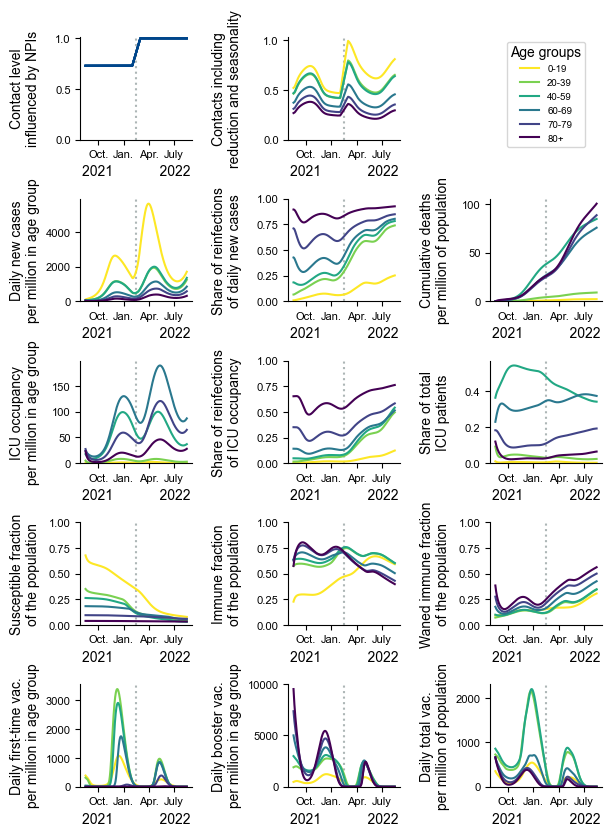

In [19]:
plotting.overview_agegroups(m3, path='./figures/fig_overviewAG_scen3.pdf', arial=True, scen=3)

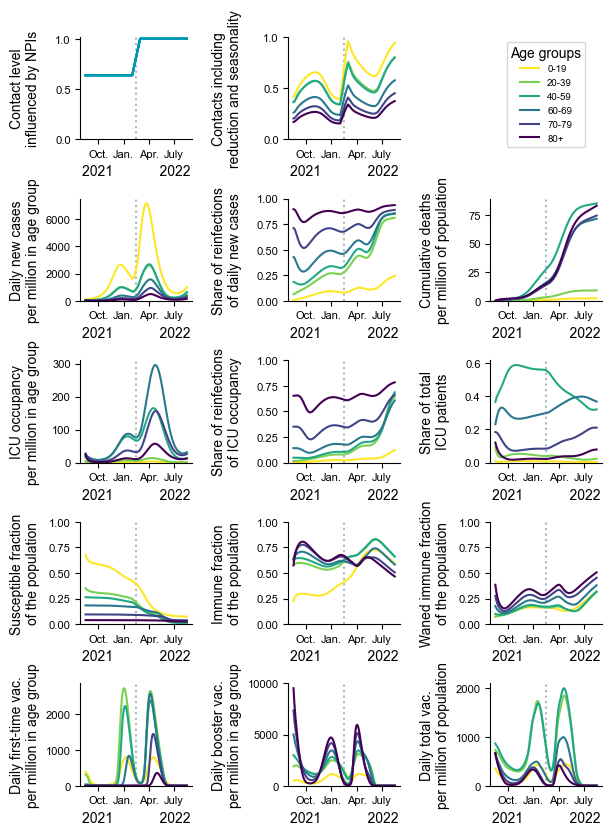

In [20]:
plotting.overview_agegroups(m4, path='./figures/fig_overviewAG_scen4.pdf', arial=True, scen=4)

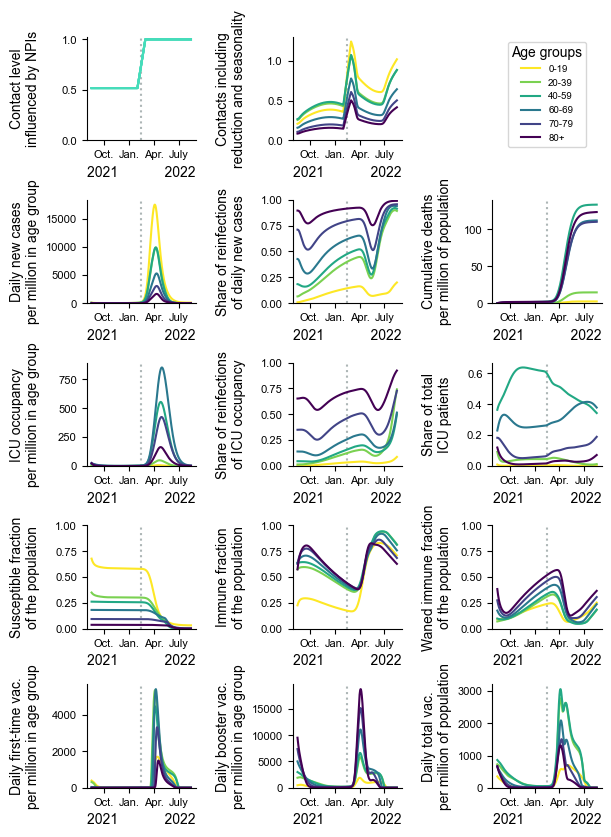

In [21]:
plotting.overview_agegroups(m5, path='./figures/fig_overviewAG_scen5.pdf', arial=True, scen=5)